<a href="https://colab.research.google.com/github/will-cotton4/DS-Unit-2-Sprint-2-Regression/blob/master/module1-ols-regression/linear-regression-assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


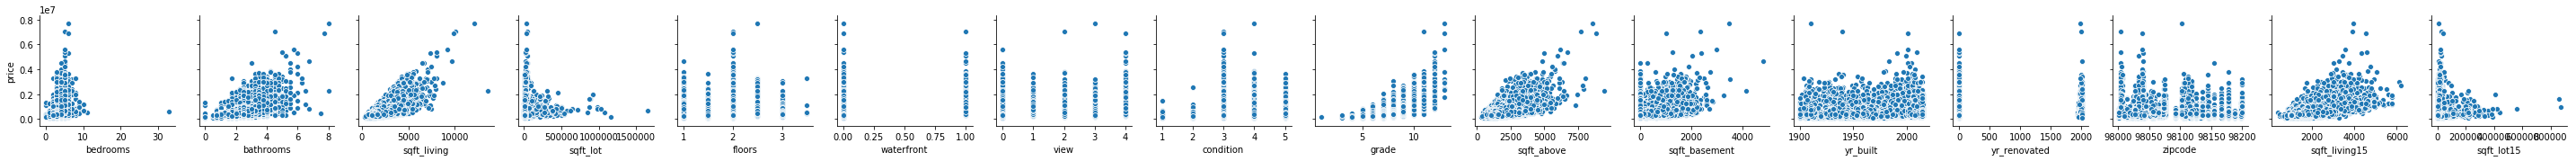

In [7]:
import seaborn as sns
# First, simple pairplot to get a basic idea of what's going on:
semiclean = df.drop(columns=['id', 'date', 'lat', 'long'])
features = semiclean.drop(columns=['price']).columns
target = 'price'
sns.pairplot(semiclean, x_vars=features, y_vars=target)

In [0]:
# Looks like sqft_living is a fairly solid first estimator for price. 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Split into training and test sets:

train, test = train_test_split(df.copy(), test_size=0.2, random_state=0)

In [30]:
train.shape, test.shape

((17290, 21), (4323, 21))

In [33]:
# Train a linear regression:
target = 'price'
x = train['sqft_living'].values.reshape(-1,1)
y = train[target].values.reshape(-1,1)

one_var_model = LinearRegression()
one_var_model.fit(x,y)

X = test['sqft_living'].values.reshape(-1,1)
Y = test[target].values.reshape(-1,1)
Y_pred = one_var_model.predict(X)
print("R^2 score:", one_var_model.score(X,Y))
print("RMSE:", sqrt(mean_squared_error(Y, Y_pred)))

R^2 score: 0.47915772372653753
RMSE: 248879.06124185046


# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 80-20 train-test-split (80% of data for training, and 20% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [42]:
# Train a linear regression:
target = 'price'
features = ['sqft_living', 'sqft_lot']
x = train[features]
y = train[target].values.reshape(-1,1)

one_var_model = LinearRegression()
one_var_model.fit(x,y)

X = test[features]
Y = test[target].values.reshape(-1,1)
Y_pred = one_var_model.predict(X)
print("R^2 score:", one_var_model.score(X,Y))
print("RMSE:", sqrt(mean_squared_error(Y, Y_pred)))

R^2 score: 0.4802079877609273
RMSE: 248628.00574707263


# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [39]:
# Train a linear regression:
target = 'price'
features = semiclean.drop(columns=['price']).columns
x = train[features]
y = train[target].values.reshape(-1,1)

one_var_model = LinearRegression()
one_var_model.fit(x,y)

X = test[features]
Y = test[target].values.reshape(-1,1)
Y_pred = one_var_model.predict(X)
print("R^2 score:", one_var_model.score(X,Y))
print("RMSE:", sqrt(mean_squared_error(Y, Y_pred)))

R^2 score: 0.6453631252431481
RMSE: 205365.3602633748


# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)
